In [1]:
### This code takes nn-generated functions and adds gaussian noise to it. The results are saved in csv files.
### The csv files are inputs for codes that compute traces of BMS and that train (other) neural networks.

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [32]:
function='leaky_ReLU' #tanh, leaky_ReLU
realization=0         #Noise realization. 0,1,2 unless otherwise specified
file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
display(d)
print(d.index.stop)

,x1,y,rep
0,-4.00,0.018426,0.0
1,-3.95,0.018062,0.0
2,-3.90,0.017699,0.0
3,-3.85,0.017335,0.0
4,-3.80,0.016971,0.0
...,...,...,...
1595,3.75,0.050947,9.0
1596,3.80,0.038210,9.0
1597,3.85,0.025473,9.0
1598,3.90,0.012737,9.0


1600


In [33]:
#Generate noise
#np.random.seed(seed=1111)

mean=0;sigma=0.2;sample=d.index.stop

noise = np.random.normal(mean,sigma,sample)
display(noise)

array([ 0.22744474,  0.03612995, -0.11912151, ..., -0.06013935,
        0.32143306, -0.15511829])

In [34]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)
d.to_csv('../data/'+ 'NN_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.018426,0.0,0.227445,0.245871
1,-3.95,0.018062,0.0,0.036130,0.054192
2,-3.90,0.017699,0.0,-0.119122,-0.101423
3,-3.85,0.017335,0.0,-0.444807,-0.427472
4,-3.80,0.016971,0.0,-0.079434,-0.062463
...,...,...,...,...,...
1595,3.75,0.050947,9.0,-0.151742,-0.100796
1596,3.80,0.038210,9.0,-0.084098,-0.045888
1597,3.85,0.025473,9.0,-0.060139,-0.034666
1598,3.90,0.012737,9.0,0.321433,0.334170


,x1,y,rep,noise,y_noise
0,-4.00,0.018426,0.0,0.227445,0.245871
1,-3.95,0.018062,0.0,0.036130,0.054192
2,-3.90,0.017699,0.0,-0.119122,-0.101423
3,-3.85,0.017335,0.0,-0.444807,-0.427472
4,-3.80,0.016971,0.0,-0.079434,-0.062463
...,...,...,...,...,...
155,3.75,0.956572,0.0,-0.541261,0.415311
156,3.80,0.967429,0.0,-0.285494,0.681935
157,3.85,0.978286,0.0,0.440712,1.418998
158,3.90,0.989143,0.0,-0.196372,0.792771


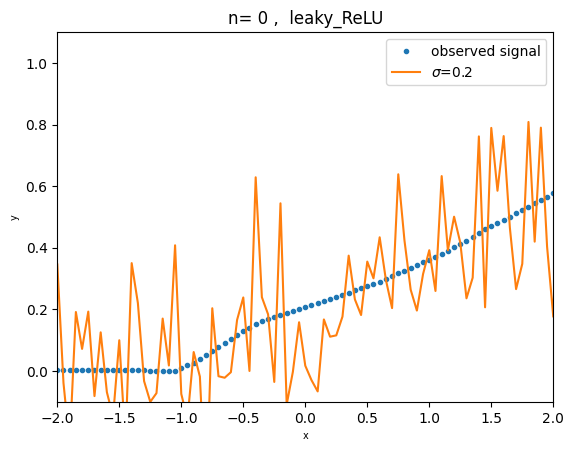

In [35]:
n=0
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed signal')
plt.plot(dn.x1,dn.y_noise,label='$\sigma$=' + str(sigma))
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='nn_' + function + '_sigma_' + str(sigma) + '_n_' + str(n) + '_r_' + str(realization)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)